In [10]:
# the dataset is the placement.csv which consists of students data for the appointment
# Steps to train and evaluate the dataset are

# 0. Preprocess + EDA + Feature Selection
# 1. Extract input and output cols
# 2. Scale the values
# 3. Train test split
# 4. Train the model
# 5. Evaluate the model/model selection
# 6. Deploy the model

import numpy as np
import pandas as pd

df = pd.read_csv('/content/placement.csv')
df.head()

,Unnamed: 0,cgpa,iq,placement
0,0,6.8,123.0,1
1,1,5.9,106.0,0
2,2,5.3,121.0,0
3,3,7.4,132.0,1
4,4,5.8,142.0,0


In [11]:
# the above dataset can be seen as there is unnecessary column as Unnamed, so in the preprocessing step remove this column
# the iloc function slices the column
df = df.iloc[:,1:]      # : means all rows needed but columns should be from 1 onwards
df.head()

,cgpa,iq,placement
0,6.8,123.0,1
1,5.9,106.0,0
2,5.3,121.0,0
3,7.4,132.0,1
4,5.8,142.0,0


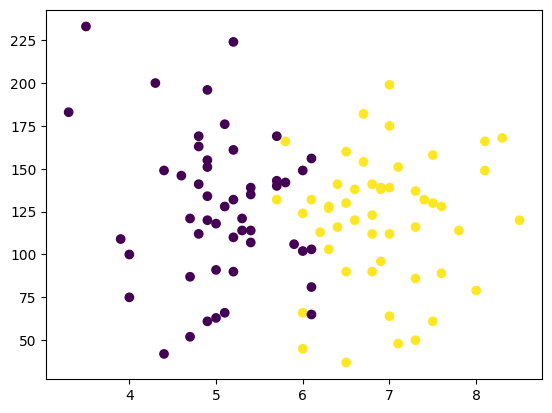

In [12]:
# the next step is for the EDA
# the yellow color is for the placement

import matplotlib.pyplot as plt
plt.scatter(df['cgpa'],df['iq'],c=df['placement'])

In [16]:
# the above scatter plot can be divided into two halves as placement or not placed
# in this scenario it is better to use the logistic regression algorithm
# the next step is to extract the input and output. The input is the independent variable which are cgpa and iq while the
# dependent or output variable is the placement



X = df.iloc[:,0:2]  # all rows and columns as 0 and 1 only which are cgpa and iq
y = df.iloc[:,-1]   # all rows and columns only the last one which is placement

X


,cgpa,iq
0,6.8,123.0
1,5.9,106.0
2,5.3,121.0
3,7.4,132.0
4,5.8,142.0
...,...,...
95,4.3,200.0
96,4.4,42.0
97,6.7,182.0
98,6.3,103.0


In [18]:
y

0     1
1     0
2     0
3     1
4     0
     ..
95    0
96    0
97    1
98    1
99    1
Name: placement, Length: 100, dtype: int64

In [21]:
# now another step is the train and split step
# we need to import the library for the train and split test step
from sklearn.model_selection import train_test_split
train_test_split(X,y,test_size=0.1)   # the X (cgpa and iq) and y (placement) and test_size is the remaining random 10 cent for the testing

[    cgpa     iq
 42   7.6   89.0
 93   6.8  112.0
 97   6.7  182.0
 57   6.5  130.0
 31   3.9  109.0
 ..   ...    ...
 85   5.8  166.0
 37   8.1  149.0
 15   5.1  176.0
 9    5.1   66.0
 30   7.6  128.0
 
 [90 rows x 2 columns],
     cgpa     iq
 41   5.4  114.0
 26   7.0  199.0
 45   6.0   66.0
 91   7.5  158.0
 95   4.3  200.0
 27   6.0  124.0
 35   6.8   90.0
 77   7.3   50.0
 23   4.7   87.0
 4    5.8  142.0,
 42    1
 93    1
 97    1
 57    1
 31    0
      ..
 85    1
 37    1
 15    0
 9     0
 30    1
 Name: placement, Length: 90, dtype: int64,
 41    0
 26    1
 45    1
 91    1
 95    0
 27    1
 35    1
 77    1
 23    0
 4     0
 Name: placement, dtype: int64]

In [22]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.1)
X_train

,cgpa,iq
39,4.6,146.0
23,4.7,87.0
65,8.1,166.0
46,5.3,114.0
59,4.8,112.0
...,...,...
62,6.0,102.0
12,5.4,139.0
73,4.9,61.0
66,6.9,96.0


In [23]:
X_test

,cgpa,iq
70,6.3,127.0
35,6.8,90.0
25,5.0,91.0
5,7.1,48.0
7,5.0,63.0
85,5.8,166.0
90,7.3,86.0
45,6.0,66.0
48,6.6,138.0
97,6.7,182.0


In [24]:
y_train

39    0
23    0
65    1
46    0
59    0
     ..
62    0
12    0
73    0
66    1
67    0
Name: placement, Length: 90, dtype: int64

In [25]:
y_test

70    1
35    1
25    0
5     1
7     0
85    1
90    1
45    1
48    1
97    1
Name: placement, dtype: int64

In [26]:
# now to scale the value which is better if used
# for scaling, use the sklearn.preprocessing and StandardScaler class
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_train



array([[-1.16507996,  0.52589051],
       [-1.07948225, -0.99258616],
       [ 1.83083994,  1.04062836],
       [-0.56589598, -0.29769006],
       [-0.99388454, -0.34916384],
       [-0.05230971, -0.5035852 ],
       [-1.4218731 ,  1.91568271],
       [ 1.23165596,  0.16557401],
       [-0.99388454,  0.96341768],
       [-0.90828683,  0.75752254],
       [ 0.29008113,  0.06262644],
       [-0.99388454,  0.39720604],
       [ 0.46127656, -2.27943079],
       [ 0.97486283,  0.65457497],
       [ 1.14605825,  0.29425847],
       [-0.22350514,  0.44867983],
       [-0.90828683,  0.65457497],
       [ 0.033288  ,  0.60310118],
       [-0.99388454,  1.11783904],
       [-0.22350514,  0.16557401],
       [ 2.00203536,  1.09210214],
       [ 1.40285138,  0.06262644],
       [-0.65149369, -0.91537548],
       [-0.48029827,  0.24278469],
       [ 0.46127656,  0.11410022],
       [-0.13790742,  0.42294294],
       [ 1.14605825, -0.24621627],
       [-0.22350514,  0.37146915],
       [ 1.57404681,

In [27]:
X_test = scaler.transform(X_test)
X_test

array([[ 0.29008113,  0.03688955],
       [ 0.71806969, -0.91537548],
       [-0.82268912, -0.88963859],
       [ 0.97486283, -1.99632497],
       [-0.82268912, -1.61027158],
       [-0.13790742,  1.04062836],
       [ 1.14605825, -1.01832305],
       [ 0.033288  , -1.5330609 ],
       [ 0.54687427,  0.31999537],
       [ 0.63247198,  1.45241864]])

In [28]:
# now to apply the logisticRegression import from the sklearn
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression()
# model training, use fit for the model training
clf.fit(X_train,y_train)

LogisticRegression()

In [29]:
# now after the model is trained, check the prediction values
y_pred = clf.predict(X_test)
y_test


70    1
35    1
25    0
5     1
7     0
85    1
90    1
45    1
48    1
97    1
Name: placement, dtype: int64

In [30]:
# to check the predicted accuracy score impor the accuracy score from the sklearn metrices
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.8

<Axes: >

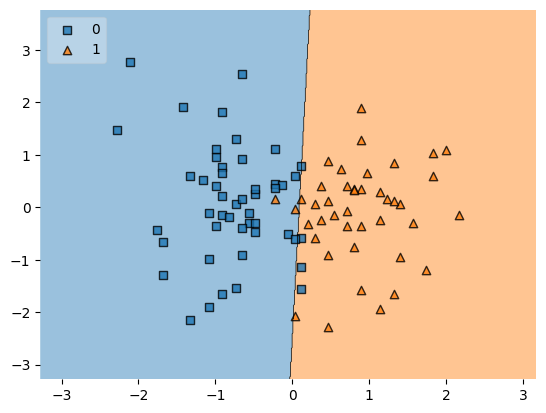

In [31]:
# need to plot the logistic regression
from mlxtend.plotting import plot_decision_regions
plot_decision_regions(X_train, y_train.values, clf=clf, legend=2)

In [32]:
# for deployment, the file needs to be imported and the object should be converted into the file
# use pickle library for this purpose
# the model.pkl will be a file conversion stored into the root directory and the file can be integrated into the website
import pickle
pickle.dump(clf,open('model.pkl','wb'))